In [1]:
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)
library(ComplexHeatmap)
library(here)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


here() starts at /Users/xiaoqin/Dropbox/TAPE LAB/Manuscripts/Qin & Ca

In [2]:
# ---
# Prepare dataframe
# ---
# Z-score
emd_df <- read.csv(here("Figure2_3-S3_S4", "WENR Permutation", "output", "emd", "emd_df_master_all-cells_z-score.csv"))
head(emd_df)


,X106Cd_RFP,X110Cd_mCherry,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X116Cd_GFP,X127I_IdU,X140Ce_EQ_Beads,X141Pr_pPDPK1_S241,X142Nd_cCaspase_3_D175,⋯,cell.type,media,W,E,N,R,genotype,A,K,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,-0.6152451,-0.6646608,0.01287216,-0.706296755,-1.5764182,0.8518059,1.2762315,-0.9062033,-0.9972826,-0.9690352,⋯,Org,Ctrl,0,0,0,0,AK,1,1,0
2,-0.6250363,-0.6745789,0.55792340,-0.269641136,-1.2711310,0.7920088,0.8975414,-1.3981397,-1.0995564,-1.3728957,⋯,Org,ENR,0,1,1,1,AK,1,1,0
3,-0.4911272,0.5111072,0.20079092,-0.004803608,-1.1059466,0.9277647,0.9027557,-1.0946742,-0.8856320,-1.0720461,⋯,Org,E,0,1,0,0,AK,1,1,0
4,-0.5926739,-0.6271794,0.09183563,-0.757078345,-1.4815525,0.8614320,1.3833423,-1.0404355,-1.0821157,-1.2748014,⋯,Org,N,0,0,1,0,AK,1,1,0
5,-0.6305662,-0.6608734,0.30716883,-0.750875838,-1.6885374,0.8262939,1.2118713,-0.9146508,-1.1692829,-1.0261598,⋯,Org,R,0,0,0,1,AK,1,1,0
6,-0.5208543,-0.6415147,0.37450780,-0.509952375,-0.9136284,0.7687789,0.9601437,-1.2693507,-1.2885358,-1.4393793,⋯,Org,WENR,1,1,1,1,AK,1,1,0


In [3]:
# ---
# Subset on conditions
# Generate metadata, cell-type and PTM marker lists on the fly
# ---

# No subsetting
emd_df_subset <- emd_df

In [4]:
# ---
# Structure the heatmap
# * The last variable to be arranged will be the first row in the top annotation
# ---

emd_df <- emd_df %>%
  arrange(factor(media, levels = c("Ctrl", "W", "E", "N", "R", "ENR", "WNR", "WER", "WEN", "WENR"))) %>%
  arrange(factor(format, levels = c("monoculture", "co-culture"))) %>% 
  arrange(factor(genotype, levels = c("WT", "A", "K", "KP", "AK", "AKP")))
  


In [5]:
# ---
# Filter on marker list
# ---

# Full panel
emd_df_full_panel <- emd_df %>% select(starts_with("X"))
head(emd_df_full_panel)

# Metadata
emd_df_metadata <- emd_df %>% select(-starts_with("X"))
head(emd_df_metadata)

# Cell-type markers
cell_type_markers <- read.csv(here("Data", "epi_cell_type_markers.csv"), header = FALSE) %>%
  as.vector() %>%
  magrittr::extract2("V1")
full_panel <- colnames(emd_df)

cell_type_marker_in_panel <- list()
for (marker in cell_type_markers) {
  marker <- str_replace(marker, "-", ".") #*
  marker_to_keep <- full_panel[grepl(marker, full_panel)]
  if (!identical(marker_to_keep, character(0))) {
    cell_type_marker_in_panel <- append(cell_type_marker_in_panel, marker_to_keep)
  }
}
emd_df_cell_type <- emd_df %>% select(unlist(cell_type_marker_in_panel))
head(emd_df_cell_type)

,X106Cd_RFP,X110Cd_mCherry,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X116Cd_GFP,X127I_IdU,X140Ce_EQ_Beads,X141Pr_pPDPK1_S241,X142Nd_cCaspase_3_D175,⋯,X172Yb_cCaspase_8_D387,X173Yb_Cyclin_B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA_1,X193Ir_DNA_2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.13985470,-0.01784887,-0.8701088,0.57673916,1.1945979,-1.0048848,-1.2377809,2.675931,1.0031845,1.3608991,⋯,-0.1613868,0.05653277,1.321350,-1.275816,1.5161882,1.2972208,1.2242902,0.6204423,-0.04071589,0.15802271
2,0.03964687,-0.06946992,-0.9246507,0.36940104,1.1654644,-0.9974827,-0.9852166,2.276119,0.9424928,1.1282561,⋯,-0.1490232,-0.20295378,1.253291,-1.392995,1.8099105,1.2441530,1.1807243,0.5074071,-0.05213327,0.06824433
3,0.07587260,-0.02681485,-0.8640234,0.41562963,1.3173180,-1.0053847,-1.2292615,2.063326,0.8126612,0.7722872,⋯,-0.4430505,-0.36821028,1.271158,-1.460845,1.0592622,1.2553716,1.2166575,0.3114881,0.05764737,0.03137488
4,-0.42597792,-0.54773522,-0.9850720,-0.25501634,0.4026514,-1.0511594,-0.7241605,2.119608,-0.6214493,0.3729360,⋯,-0.8241850,-0.88135595,2.027876,-2.056491,0.5041767,0.5720932,0.5414947,-1.1563939,-1.04368965,-0.87865747
5,-0.31374055,-0.47788411,-0.8679223,0.08369005,0.5650726,-1.0478922,-0.9346136,1.986256,-0.5409641,0.2584798,⋯,-0.7105373,-0.81969161,1.915249,-2.042707,0.7519062,0.6998200,0.6805646,-1.2577895,-0.94468115,-0.61635552
6,-0.47904803,-0.57379246,-1.0265980,-0.09740364,0.6197074,-1.0853382,-0.9142130,1.774778,-1.0470904,0.1867744,⋯,-0.8760112,-0.98998719,2.089513,-2.109506,0.3716711,0.5628852,0.5214102,-1.4185853,-1.06617466,-0.99067474


,batch,replicate,condition,culture,format,cell.type,media,W,E,N,R,genotype,A,K,P
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,B2,1,WT_Ctrl_Org_1,WT_Ctrl,monoculture,Org,Ctrl,0,0,0,0,WT,0,0,0
2,B2,2,WT_Ctrl_Org_2,WT_Ctrl,monoculture,Org,Ctrl,0,0,0,0,WT,0,0,0
3,B2,3,WT_Ctrl_Org_3,WT_Ctrl,monoculture,Org,Ctrl,0,0,0,0,WT,0,0,0
4,B2,1,WT_W_Org_1,WT_W,monoculture,Org,W,1,0,0,0,WT,0,0,0
5,B2,2,WT_W_Org_2,WT_W,monoculture,Org,W,1,0,0,0,WT,0,0,0
6,B2,3,WT_W_Org_3,WT_W,monoculture,Org,W,1,0,0,0,WT,0,0,0


,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X143Nd_C.MYC_1,X162Dy_LRIG1_1,X169Tm_EPHB2,X171Yb_SOX9_5,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8701088,0.57673916,1.1945979,-0.4684622,-1.514626,-1.754167,-1.699508,1.321350,-1.275816,1.5161882
2,-0.9246507,0.36940104,1.1654644,-0.4355936,-1.602103,-1.767118,-1.685424,1.253291,-1.392995,1.8099105
3,-0.8640234,0.41562963,1.3173180,-0.6957918,-1.594908,-1.752184,-1.815170,1.271158,-1.460845,1.0592622
4,-0.9850720,-0.25501634,0.4026514,-1.1012609,-2.086550,-1.693766,-2.256984,2.027876,-2.056491,0.5041767
5,-0.8679223,0.08369005,0.5650726,-1.0902067,-2.054818,-1.658317,-2.195440,1.915249,-2.042707,0.7519062
6,-1.0265980,-0.09740364,0.6197074,-1.2921449,-2.056941,-1.687154,-2.269011,2.089513,-2.109506,0.3716711


5%       95% 
-1.492062  1.724347

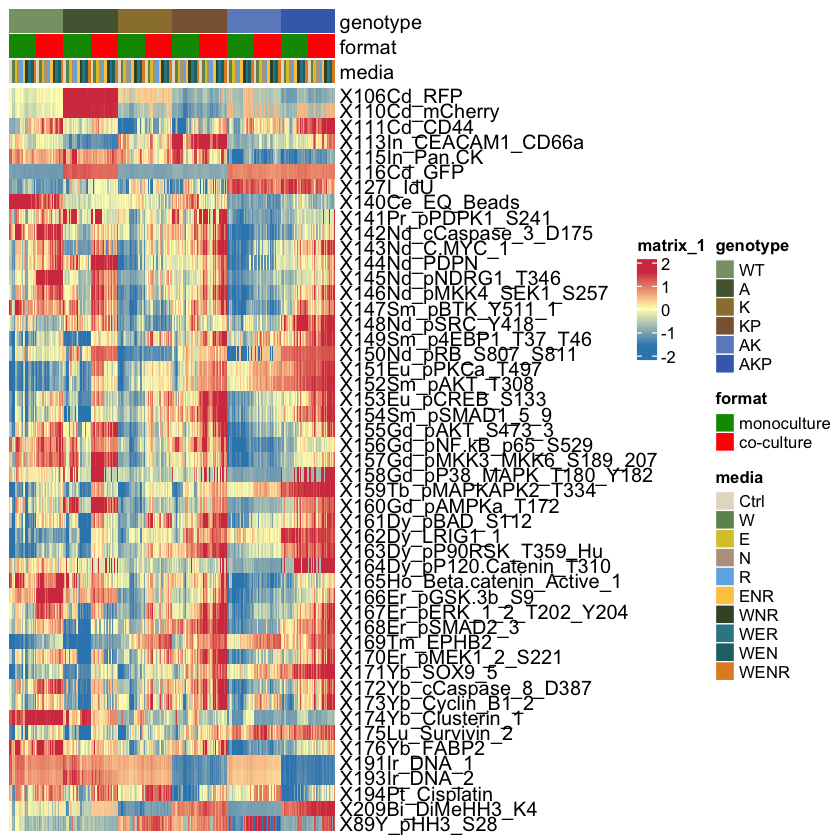

In [6]:
# ---
# Complex Heatmap
# ---

mat <- emd_df_full_panel %>%
    as.matrix() %>%
    t()
quantile(mat, c(0.05, 0.95)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-1.6, 0, 1.6), c("#3288BD", "#FEFEBD", "#D53E4F"))

ha <- HeatmapAnnotation(
    genotype = factor(emd_df_metadata[, "genotype"], levels = c("WT", "A", "K", "KP", "AK", "AKP")),
    format = factor(emd_df_metadata[, "format"], levels = c("monoculture", "co-culture")),
    media = factor(emd_df_metadata[, "media"],
        levels = c("Ctrl", "W", "E", "N", "R", "ENR", "WNR", "WER", "WEN", "WENR")
    ),
    col = list(
        genotype = c(
            "WT" = "#87A076", "A" = "#576441",
            "K" = "#9B7F3C", "KP" = "#8B6240",
            "AK" = "#6C8DC6", "AKP" = "#436DB8"
        ),
        format = c(
            "monoculture" = "#079601",
            "co-culture" = "#FF2600"
        ),
        media = c(
            "Ctrl" = "#E6DCCB",
            "W" = "#6E925E",
            "E" = "#DBC636",
            "N" = "#BAA18B",
            "R" = "#71B3E7",
            "ENR" = "#FDC950",
            "WNR" = "#41512E",
            "WER" = "#348794",
            "WEN" = "#207176",
            "WENR" = "#E48C2AFF"
        )
    )
)

Heatmap(mat,
    cluster_rows = FALSE,
    cluster_columns = FALSE,
    col = colour,
    top_annotation = ha
)
